In [1]:
import io
import pandas as pd

In [2]:
# Copy-pasted the last available spreadsheet at
# https://www.gov.uk/government/publications/monkeypox-outbreak-technical-briefings

In [3]:
raw_string = """Specimen date	region	Number of cumulative cases
05/05/2022	East of England	0
05/05/2022	East Midlands	0
05/05/2022	London	1
05/05/2022	North East	0
05/05/2022	North West	0
05/05/2022	South East	0
05/05/2022	South West	0
05/05/2022	West Midlands	0
05/05/2022	Yorkshire and Humber	0
05/05/2022	Unknown	0
06/05/2022	East of England	0
06/05/2022	East Midlands	0
06/05/2022	London	2
06/05/2022	North East	0
06/05/2022	North West	0
06/05/2022	South East	0
06/05/2022	South West	0
06/05/2022	West Midlands	0
06/05/2022	Yorkshire and Humber	0
06/05/2022	Unknown	0
07/05/2022	East of England	0
07/05/2022	East Midlands	0
07/05/2022	London	2
07/05/2022	North East	0
07/05/2022	North West	0
07/05/2022	South East	0
07/05/2022	South West	0
07/05/2022	West Midlands	0
07/05/2022	Yorkshire and Humber	0
07/05/2022	Unknown	0
08/05/2022	East of England	0
08/05/2022	East Midlands	0
08/05/2022	London	2
08/05/2022	North East	0
08/05/2022	North West	0
08/05/2022	South East	0
08/05/2022	South West	0
08/05/2022	West Midlands	0
08/05/2022	Yorkshire and Humber	0
08/05/2022	Unknown	0
09/05/2022	East of England	0
09/05/2022	East Midlands	0
09/05/2022	London	2
09/05/2022	North East	0
09/05/2022	North West	0
09/05/2022	South East	0
09/05/2022	South West	0
09/05/2022	West Midlands	0
09/05/2022	Yorkshire and Humber	0
09/05/2022	Unknown	0
10/05/2022	East of England	0
10/05/2022	East Midlands	0
10/05/2022	London	2
10/05/2022	North East	0
10/05/2022	North West	0
10/05/2022	South East	0
10/05/2022	South West	0
10/05/2022	West Midlands	0
10/05/2022	Yorkshire and Humber	0
10/05/2022	Unknown	0
11/05/2022	East of England	0
11/05/2022	East Midlands	0
11/05/2022	London	2
11/05/2022	North East	0
11/05/2022	North West	0
11/05/2022	South East	0
11/05/2022	South West	0
11/05/2022	West Midlands	0
11/05/2022	Yorkshire and Humber	0
11/05/2022	Unknown	0
12/05/2022	East of England	0
12/05/2022	East Midlands	0
12/05/2022	London	5
12/05/2022	North East	0
12/05/2022	North West	0
12/05/2022	South East	0
12/05/2022	South West	0
12/05/2022	West Midlands	0
12/05/2022	Yorkshire and Humber	0
12/05/2022	Unknown	0
13/05/2022	East of England	0
13/05/2022	East Midlands	0
13/05/2022	London	5
13/05/2022	North East	0
13/05/2022	North West	0
13/05/2022	South East	0
13/05/2022	South West	0
13/05/2022	West Midlands	0
13/05/2022	Yorkshire and Humber	0
13/05/2022	Unknown	0
14/05/2022	East of England	0
14/05/2022	East Midlands	0
14/05/2022	London	6
14/05/2022	North East	1
14/05/2022	North West	0
14/05/2022	South East	1
14/05/2022	South West	0
14/05/2022	West Midlands	0
14/05/2022	Yorkshire and Humber	0
14/05/2022	Unknown	0
15/05/2022	East of England	0
15/05/2022	East Midlands	0
15/05/2022	London	6
15/05/2022	North East	1
15/05/2022	North West	0
15/05/2022	South East	1
15/05/2022	South West	0
15/05/2022	West Midlands	0
15/05/2022	Yorkshire and Humber	0
15/05/2022	Unknown	0
16/05/2022	East of England	0
16/05/2022	East Midlands	0
16/05/2022	London	9
16/05/2022	North East	1
16/05/2022	North West	0
16/05/2022	South East	2
16/05/2022	South West	0
16/05/2022	West Midlands	0
16/05/2022	Yorkshire and Humber	0
16/05/2022	Unknown	0
17/05/2022	East of England	0
17/05/2022	East Midlands	0
17/05/2022	London	12
17/05/2022	North East	1
17/05/2022	North West	0
17/05/2022	South East	3
17/05/2022	South West	0
17/05/2022	West Midlands	0
17/05/2022	Yorkshire and Humber	0
17/05/2022	Unknown	0
18/05/2022	East of England	1
18/05/2022	East Midlands	0
18/05/2022	London	17
18/05/2022	North East	1
18/05/2022	North West	0
18/05/2022	South East	4
18/05/2022	South West	0
18/05/2022	West Midlands	0
18/05/2022	Yorkshire and Humber	0
18/05/2022	Unknown	0
19/05/2022	East of England	1
19/05/2022	East Midlands	0
19/05/2022	London	40
19/05/2022	North East	1
19/05/2022	North West	0
19/05/2022	South East	4
19/05/2022	South West	0
19/05/2022	West Midlands	0
19/05/2022	Yorkshire and Humber	0
19/05/2022	Unknown	0
20/05/2022	East of England	2
20/05/2022	East Midlands	0
20/05/2022	London	65
20/05/2022	North East	1
20/05/2022	North West	0
20/05/2022	South East	5
20/05/2022	South West	0
20/05/2022	West Midlands	0
20/05/2022	Yorkshire and Humber	0
20/05/2022	Unknown	0
21/05/2022	East of England	2
21/05/2022	East Midlands	0
21/05/2022	London	71
21/05/2022	North East	1
21/05/2022	North West	0
21/05/2022	South East	5
21/05/2022	South West	0
21/05/2022	West Midlands	0
21/05/2022	Yorkshire and Humber	0
21/05/2022	Unknown	0
22/05/2022	East of England	2
22/05/2022	East Midlands	0
22/05/2022	London	74
22/05/2022	North East	1
22/05/2022	North West	0
22/05/2022	South East	5
22/05/2022	South West	0
22/05/2022	West Midlands	0
22/05/2022	Yorkshire and Humber	0
22/05/2022	Unknown	0
23/05/2022	East of England	3
23/05/2022	East Midlands	0
23/05/2022	London	86
23/05/2022	North East	1
23/05/2022	North West	1
23/05/2022	South East	7
23/05/2022	South West	0
23/05/2022	West Midlands	2
23/05/2022	Yorkshire and Humber	0
23/05/2022	Unknown	0
24/05/2022	East of England	4
24/05/2022	East Midlands	1
24/05/2022	London	104
24/05/2022	North East	1
24/05/2022	North West	2
24/05/2022	South East	8
24/05/2022	South West	0
24/05/2022	West Midlands	2
24/05/2022	Yorkshire and Humber	0
24/05/2022	Unknown	1
25/05/2022	East of England	4
25/05/2022	East Midlands	1
25/05/2022	London	124
25/05/2022	North East	1
25/05/2022	North West	3
25/05/2022	South East	8
25/05/2022	South West	0
25/05/2022	West Midlands	2
25/05/2022	Yorkshire and Humber	0
25/05/2022	Unknown	3
26/05/2022	East of England	4
26/05/2022	East Midlands	3
26/05/2022	London	140
26/05/2022	North East	3
26/05/2022	North West	3
26/05/2022	South East	10
26/05/2022	South West	0
26/05/2022	West Midlands	2
26/05/2022	Yorkshire and Humber	0
26/05/2022	Unknown	3
27/05/2022	East of England	5
27/05/2022	East Midlands	3
27/05/2022	London	152
27/05/2022	North East	3
27/05/2022	North West	5
27/05/2022	South East	12
27/05/2022	South West	0
27/05/2022	West Midlands	2
27/05/2022	Yorkshire and Humber	0
27/05/2022	Unknown	3
28/05/2022	East of England	6
28/05/2022	East Midlands	3
28/05/2022	London	159
28/05/2022	North East	3
28/05/2022	North West	5
28/05/2022	South East	14
28/05/2022	South West	0
28/05/2022	West Midlands	2
28/05/2022	Yorkshire and Humber	0
28/05/2022	Unknown	3
29/05/2022	East of England	7
29/05/2022	East Midlands	3
29/05/2022	London	165
29/05/2022	North East	3
29/05/2022	North West	5
29/05/2022	South East	14
29/05/2022	South West	0
29/05/2022	West Midlands	2
29/05/2022	Yorkshire and Humber	0
29/05/2022	Unknown	3
30/05/2022	East of England	9
30/05/2022	East Midlands	3
30/05/2022	London	185
30/05/2022	North East	3
30/05/2022	North West	6
30/05/2022	South East	16
30/05/2022	South West	0
30/05/2022	West Midlands	3
30/05/2022	Yorkshire and Humber	0
30/05/2022	Unknown	4
31/05/2022	East of England	9
31/05/2022	East Midlands	4
31/05/2022	London	205
31/05/2022	North East	3
31/05/2022	North West	8
31/05/2022	South East	17
31/05/2022	South West	0
31/05/2022	West Midlands	4
31/05/2022	Yorkshire and Humber	0
31/05/2022	Unknown	4
01/06/2022	East of England	9
01/06/2022	East Midlands	4
01/06/2022	London	225
01/06/2022	North East	3
01/06/2022	North West	11
01/06/2022	South East	17
01/06/2022	South West	2
01/06/2022	West Midlands	4
01/06/2022	Yorkshire and Humber	1
01/06/2022	Unknown	4
02/06/2022	East of England	9
02/06/2022	East Midlands	4
02/06/2022	London	238
02/06/2022	North East	3
02/06/2022	North West	11
02/06/2022	South East	17
02/06/2022	South West	2
02/06/2022	West Midlands	4
02/06/2022	Yorkshire and Humber	1
02/06/2022	Unknown	5
03/06/2022	East of England	9
03/06/2022	East Midlands	4
03/06/2022	London	239
03/06/2022	North East	3
03/06/2022	North West	12
03/06/2022	South East	18
03/06/2022	South West	2
03/06/2022	West Midlands	4
03/06/2022	Yorkshire and Humber	1
03/06/2022	Unknown	5
04/06/2022	East of England	9
04/06/2022	East Midlands	4
04/06/2022	London	250
04/06/2022	North East	3
04/06/2022	North West	14
04/06/2022	South East	19
04/06/2022	South West	2
04/06/2022	West Midlands	4
04/06/2022	Yorkshire and Humber	1
04/06/2022	Unknown	5
05/06/2022	East of England	9
05/06/2022	East Midlands	4
05/06/2022	London	258
05/06/2022	North East	3
05/06/2022	North West	14
05/06/2022	South East	19
05/06/2022	South West	2
05/06/2022	West Midlands	4
05/06/2022	Yorkshire and Humber	1
05/06/2022	Unknown	5
06/06/2022	East of England	10
06/06/2022	East Midlands	4
06/06/2022	London	283
06/06/2022	North East	3
06/06/2022	North West	14
06/06/2022	South East	19
06/06/2022	South West	2
06/06/2022	West Midlands	7
06/06/2022	Yorkshire and Humber	3
06/06/2022	Unknown	6
07/06/2022	East of England	11
07/06/2022	East Midlands	4
07/06/2022	London	315
07/06/2022	North East	4
07/06/2022	North West	17
07/06/2022	South East	21
07/06/2022	South West	2
07/06/2022	West Midlands	8
07/06/2022	Yorkshire and Humber	4
07/06/2022	Unknown	7
08/06/2022	East of England	12
08/06/2022	East Midlands	4
08/06/2022	London	323
08/06/2022	North East	4
08/06/2022	North West	20
08/06/2022	South East	24
08/06/2022	South West	2
08/06/2022	West Midlands	8
08/06/2022	Yorkshire and Humber	4
08/06/2022	Unknown	8
09/06/2022	East of England	12
09/06/2022	East Midlands	6
09/06/2022	London	354
09/06/2022	North East	4
09/06/2022	North West	20
09/06/2022	South East	26
09/06/2022	South West	2
09/06/2022	West Midlands	8
09/06/2022	Yorkshire and Humber	4
09/06/2022	Unknown	8
10/06/2022	East of England	13
10/06/2022	East Midlands	6
10/06/2022	London	387
10/06/2022	North East	5
10/06/2022	North West	21
10/06/2022	South East	27
10/06/2022	South West	2
10/06/2022	West Midlands	8
10/06/2022	Yorkshire and Humber	5
10/06/2022	Unknown	10
11/06/2022	East of England	14
11/06/2022	East Midlands	6
11/06/2022	London	404
11/06/2022	North East	5
11/06/2022	North West	21
11/06/2022	South East	29
11/06/2022	South West	2
11/06/2022	West Midlands	8
11/06/2022	Yorkshire and Humber	5
11/06/2022	Unknown	11
12/06/2022	East of England	14
12/06/2022	East Midlands	6
12/06/2022	London	412
12/06/2022	North East	5
12/06/2022	North West	21
12/06/2022	South East	29
12/06/2022	South West	3
12/06/2022	West Midlands	8
12/06/2022	Yorkshire and Humber	5
12/06/2022	Unknown	13
13/06/2022	East of England	16
13/06/2022	East Midlands	6
13/06/2022	London	446
13/06/2022	North East	5
13/06/2022	North West	22
13/06/2022	South East	31
13/06/2022	South West	3
13/06/2022	West Midlands	10
13/06/2022	Yorkshire and Humber	6
13/06/2022	Unknown	14
14/06/2022	East of England	17
14/06/2022	East Midlands	7
14/06/2022	London	483
14/06/2022	North East	5
14/06/2022	North West	22
14/06/2022	South East	34
14/06/2022	South West	4
14/06/2022	West Midlands	11
14/06/2022	Yorkshire and Humber	9
14/06/2022	Unknown	14
15/06/2022	East of England	18
15/06/2022	East Midlands	7
15/06/2022	London	512
15/06/2022	North East	5
15/06/2022	North West	25
15/06/2022	South East	38
15/06/2022	South West	5
15/06/2022	West Midlands	11
15/06/2022	Yorkshire and Humber	11
15/06/2022	Unknown	14
16/06/2022	East of England	20
16/06/2022	East Midlands	9
16/06/2022	London	563
16/06/2022	North East	5
16/06/2022	North West	29
16/06/2022	South East	41
16/06/2022	South West	6
16/06/2022	West Midlands	11
16/06/2022	Yorkshire and Humber	11
16/06/2022	Unknown	14
17/06/2022	East of England	22
17/06/2022	East Midlands	9
17/06/2022	London	610
17/06/2022	North East	5
17/06/2022	North West	30
17/06/2022	South East	46
17/06/2022	South West	7
17/06/2022	West Midlands	13
17/06/2022	Yorkshire and Humber	11
17/06/2022	Unknown	14
18/06/2022	East of England	25
18/06/2022	East Midlands	9
18/06/2022	London	632
18/06/2022	North East	5
18/06/2022	North West	30
18/06/2022	South East	48
18/06/2022	South West	7
18/06/2022	West Midlands	13
18/06/2022	Yorkshire and Humber	11
18/06/2022	Unknown	14
19/06/2022	East of England	26
19/06/2022	East Midlands	9
19/06/2022	London	642
19/06/2022	North East	5
19/06/2022	North West	32
19/06/2022	South East	48
19/06/2022	South West	7
19/06/2022	West Midlands	13
19/06/2022	Yorkshire and Humber	11
19/06/2022	Unknown	14
20/06/2022	East of England	29
20/06/2022	East Midlands	11
20/06/2022	London	685
20/06/2022	North East	5
20/06/2022	North West	35
20/06/2022	South East	54
20/06/2022	South West	7
20/06/2022	West Midlands	14
20/06/2022	Yorkshire and Humber	11
20/06/2022	Unknown	14
21/06/2022	East of England	29
21/06/2022	East Midlands	11
21/06/2022	London	732
21/06/2022	North East	5
21/06/2022	North West	40
21/06/2022	South East	59
21/06/2022	South West	9
21/06/2022	West Midlands	15
21/06/2022	Yorkshire and Humber	12
21/06/2022	Unknown	14
22/06/2022	East of England	32
22/06/2022	East Midlands	11
22/06/2022	London	774
22/06/2022	North East	6
22/06/2022	North West	42
22/06/2022	South East	62
22/06/2022	South West	13
22/06/2022	West Midlands	19
22/06/2022	Yorkshire and Humber	12
22/06/2022	Unknown	14
23/06/2022	East of England	32
23/06/2022	East Midlands	11
23/06/2022	London	807
23/06/2022	North East	7
23/06/2022	North West	47
23/06/2022	South East	68
23/06/2022	South West	13
23/06/2022	West Midlands	19
23/06/2022	Yorkshire and Humber	12
23/06/2022	Unknown	14
24/06/2022	East of England	41
24/06/2022	East Midlands	11
24/06/2022	London	856
24/06/2022	North East	7
24/06/2022	North West	49
24/06/2022	South East	74
24/06/2022	South West	14
24/06/2022	West Midlands	21
24/06/2022	Yorkshire and Humber	13
24/06/2022	Unknown	15
25/06/2022	East of England	42
25/06/2022	East Midlands	11
25/06/2022	London	870
25/06/2022	North East	7
25/06/2022	North West	49
25/06/2022	South East	75
25/06/2022	South West	14
25/06/2022	West Midlands	21
25/06/2022	Yorkshire and Humber	14
25/06/2022	Unknown	15
26/06/2022	East of England	42
26/06/2022	East Midlands	11
26/06/2022	London	886
26/06/2022	North East	7
26/06/2022	North West	53
26/06/2022	South East	75
26/06/2022	South West	14
26/06/2022	West Midlands	21
26/06/2022	Yorkshire and Humber	15
26/06/2022	Unknown	15
27/06/2022	East of England	43
27/06/2022	East Midlands	11
27/06/2022	London	934
27/06/2022	North East	8
27/06/2022	North West	55
27/06/2022	South East	78
27/06/2022	South West	14
27/06/2022	West Midlands	21
27/06/2022	Yorkshire and Humber	16
27/06/2022	Unknown	15
28/06/2022	East of England	46
28/06/2022	East Midlands	12
28/06/2022	London	982
28/06/2022	North East	10
28/06/2022	North West	61
28/06/2022	South East	87
28/06/2022	South West	17
28/06/2022	West Midlands	25
28/06/2022	Yorkshire and Humber	16
28/06/2022	Unknown	15
29/06/2022	East of England	47
29/06/2022	East Midlands	14
29/06/2022	London	1,013
29/06/2022	North East	12
29/06/2022	North West	66
29/06/2022	South East	89
29/06/2022	South West	18
29/06/2022	West Midlands	26
29/06/2022	Yorkshire and Humber	16
29/06/2022	Unknown	15
30/06/2022	East of England	52
30/06/2022	East Midlands	14
30/06/2022	London	1,058
30/06/2022	North East	14
30/06/2022	North West	72
30/06/2022	South East	93
30/06/2022	South West	21
30/06/2022	West Midlands	29
30/06/2022	Yorkshire and Humber	19
30/06/2022	Unknown	15
01/07/2022	East of England	57
01/07/2022	East Midlands	14
01/07/2022	London	1,100
01/07/2022	North East	15
01/07/2022	North West	80
01/07/2022	South East	99
01/07/2022	South West	21
01/07/2022	West Midlands	30
01/07/2022	Yorkshire and Humber	19
01/07/2022	Unknown	15
02/07/2022	East of England	58
02/07/2022	East Midlands	14
02/07/2022	London	1,117
02/07/2022	North East	17
02/07/2022	North West	82
02/07/2022	South East	100
02/07/2022	South West	21
02/07/2022	West Midlands	30
02/07/2022	Yorkshire and Humber	19
02/07/2022	Unknown	15
03/07/2022	East of England	58
03/07/2022	East Midlands	14
03/07/2022	London	1,122
03/07/2022	North East	17
03/07/2022	North West	82
03/07/2022	South East	101
03/07/2022	South West	21
03/07/2022	West Midlands	30
03/07/2022	Yorkshire and Humber	19
03/07/2022	Unknown	15
04/07/2022	East of England	61
04/07/2022	East Midlands	16
04/07/2022	London	1,155
04/07/2022	North East	17
04/07/2022	North West	87
04/07/2022	South East	110
04/07/2022	South West	22
04/07/2022	West Midlands	33
04/07/2022	Yorkshire and Humber	20
04/07/2022	Unknown	15
05/07/2022	East of England	61
05/07/2022	East Midlands	17
05/07/2022	London	1,179
05/07/2022	North East	17
05/07/2022	North West	93
05/07/2022	South East	122
05/07/2022	South West	24
05/07/2022	West Midlands	35
05/07/2022	Yorkshire and Humber	20
05/07/2022	Unknown	15
06/07/2022	East of England	67
06/07/2022	East Midlands	18
06/07/2022	London	1,212
06/07/2022	North East	17
06/07/2022	North West	96
06/07/2022	South East	124
06/07/2022	South West	24
06/07/2022	West Midlands	37
06/07/2022	Yorkshire and Humber	21
06/07/2022	Unknown	15
07/07/2022	East of England	68
07/07/2022	East Midlands	18
07/07/2022	London	1,252
07/07/2022	North East	18
07/07/2022	North West	98
07/07/2022	South East	134
07/07/2022	South West	26
07/07/2022	West Midlands	38
07/07/2022	Yorkshire and Humber	24
07/07/2022	Unknown	15
08/07/2022	East of England	70
08/07/2022	East Midlands	20
08/07/2022	London	1,287
08/07/2022	North East	18
08/07/2022	North West	103
08/07/2022	South East	141
08/07/2022	South West	27
08/07/2022	West Midlands	39
08/07/2022	Yorkshire and Humber	24
08/07/2022	Unknown	16
09/07/2022	East of England	70
09/07/2022	East Midlands	20
09/07/2022	London	1,298
09/07/2022	North East	18
09/07/2022	North West	104
09/07/2022	South East	141
09/07/2022	South West	27
09/07/2022	West Midlands	40
09/07/2022	Yorkshire and Humber	24
09/07/2022	Unknown	16
10/07/2022	East of England	70
10/07/2022	East Midlands	20
10/07/2022	London	1,305
10/07/2022	North East	18
10/07/2022	North West	104
10/07/2022	South East	142
10/07/2022	South West	28
10/07/2022	West Midlands	40
10/07/2022	Yorkshire and Humber	24
10/07/2022	Unknown	16
11/07/2022	East of England	73
11/07/2022	East Midlands	20
11/07/2022	London	1,347
11/07/2022	North East	20
11/07/2022	North West	107
11/07/2022	South East	152
11/07/2022	South West	29
11/07/2022	West Midlands	42
11/07/2022	Yorkshire and Humber	25
11/07/2022	Unknown	16
12/07/2022	East of England	76
12/07/2022	East Midlands	22
12/07/2022	London	1,394
12/07/2022	North East	20
12/07/2022	North West	108
12/07/2022	South East	163
12/07/2022	South West	30
12/07/2022	West Midlands	45
12/07/2022	Yorkshire and Humber	28
12/07/2022	Unknown	16
13/07/2022	East of England	79
13/07/2022	East Midlands	23
13/07/2022	London	1,421
13/07/2022	North East	20
13/07/2022	North West	109
13/07/2022	South East	168
13/07/2022	South West	30
13/07/2022	West Midlands	46
13/07/2022	Yorkshire and Humber	30
13/07/2022	Unknown	16
14/07/2022	East of England	84
14/07/2022	East Midlands	24
14/07/2022	London	1,461
14/07/2022	North East	20
14/07/2022	North West	112
14/07/2022	South East	170
14/07/2022	South West	31
14/07/2022	West Midlands	51
14/07/2022	Yorkshire and Humber	31
14/07/2022	Unknown	16
15/07/2022	East of England	84
15/07/2022	East Midlands	25
15/07/2022	London	1,498
15/07/2022	North East	22
15/07/2022	North West	114
15/07/2022	South East	173
15/07/2022	South West	33
15/07/2022	West Midlands	51
15/07/2022	Yorkshire and Humber	33
15/07/2022	Unknown	16
16/07/2022	East of England	86
16/07/2022	East Midlands	25
16/07/2022	London	1,510
16/07/2022	North East	22
16/07/2022	North West	114
16/07/2022	South East	174
16/07/2022	South West	34
16/07/2022	West Midlands	51
16/07/2022	Yorkshire and Humber	35
16/07/2022	Unknown	16
17/07/2022	East of England	86
17/07/2022	East Midlands	25
17/07/2022	London	1,512
17/07/2022	North East	22
17/07/2022	North West	114
17/07/2022	South East	174
17/07/2022	South West	34
17/07/2022	West Midlands	51
17/07/2022	Yorkshire and Humber	35
17/07/2022	Unknown	16
18/07/2022	East of England	86
18/07/2022	East Midlands	25
18/07/2022	London	1,513
18/07/2022	North East	22
18/07/2022	North West	114
18/07/2022	South East	174
18/07/2022	South West	34
18/07/2022	West Midlands	51
18/07/2022	Yorkshire and Humber	35
18/07/2022	Unknown	16
"""

In [4]:
csv_string = io.StringIO(raw_string.replace(",", "").replace("\t", ","))
df = pd.read_csv(csv_string)

In [5]:
df["date"] = pd.to_datetime(df.pop("Specimen date"), format="%d/%m/%Y")

In [6]:
df["cases"] = df.pop("Number of cumulative cases")

In [7]:
df = df[['date', 'region', 'cases']]

In [8]:
cumulative_cases_by_region = df.pivot_table(index='date', columns='region', values='cases', aggfunc='sum')

In [9]:
daily_cases_by_region = cumulative_cases_by_region.diff()

<AxesSubplot:xlabel='date'>

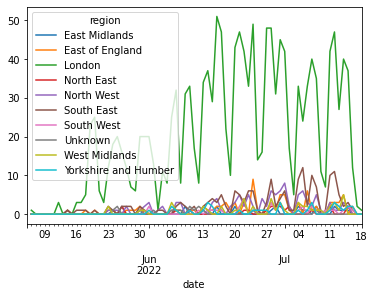

In [10]:
daily_cases_by_region.plot()

In [11]:
daily_cases_by_region.to_csv("./data/daily_by_region.csv")